### Program to implement PCA for Wisconsin dataset, visualize and analyze the results.

In [15]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [16]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
labels = data.target_names

In [17]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)

In [19]:
# Create a DataFrame for visualization
df = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'target': y
})

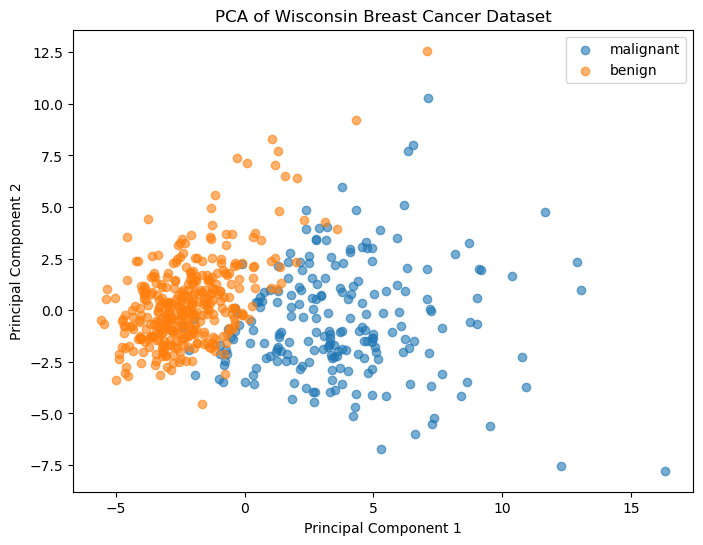

In [20]:
# Plot PCA results
plt.figure(figsize=(8, 6))
plt.scatter(df[df.target == 0]['PC1'], df[df.target == 0]['PC2'], label=labels[0], alpha=0.6)
plt.scatter(df[df.target == 1]['PC1'], df[df.target == 1]['PC2'], label=labels[1], alpha=0.6)
plt.title('PCA of Wisconsin Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [21]:
# Print explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.44272026 0.18971182]
